# 10 YEARS DIABETES CHALLENGE

# Brief description of the data

The dataset encompasses 10 years (1999-2008) of clinical care data from 130 U.S. hospitals and integrated delivery networks, focusing on patient and hospital outcomes. Extracted from a larger database, this specific subset contains records of inpatient encounters that meet several criteria: the patient was hospitalized for a diabetic condition, the length of stay was between 1 and 14 days, laboratory tests were conducted, and medications were administered. The dataset includes over 50 features that provide detailed information on various aspects of the patient's hospital stay, offering a comprehensive view of diabetes-related clinical care.

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.


# Problem Statement

The dataset covers 10 years of clinical care for diabetic patients in multiple US hospitals, containing features related to patient demographics, admission details, medical specialties, lab tests, and medications. It includes inpatient encounters where laboratory tests and medications were administered. The goal is to use this dataset to analyze and predict various aspects of diabetes care and patient outcomes.



<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Data Cleaning/Preprocessing</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Feauture Engineering</a>

<a href=#six>6. Modelling Section</a>

<a href=#seven>7. Conclusion </a>

<a href=#eight>7. References </a>



<a href=#one>1. Importing Packages</a>

In [1]:
import pandas as pd
# This imports the pandas library, which helps us work with data in tables.pd for short.
import numpy as np
# helps us do math and work with numbers, especially in lists or arrays. We use np as a short name.
import matplotlib.pyplot as plt
#  which helps us make graphs and plots to visualize our data. We use plt as a short name.
import seaborn as sns
# makes it easier to create nice-looking graphs and plots. We use sns as a short name.
from io import StringIO
#which allows us to create data in a way that looks like it's being read from a file, even though it's just a text.
from sklearn.model_selection import train_test_split
# helps us build and test machine learning models.
#  train_test_split helps us split our data into two parts: one for training our model and one for testing it.
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# helps standardize (scale) our data,
#  so it has a mean of 0 and a standard deviation of 1, making it easier for models to learn.
# helps convert categorical data (like colors or types) into numbers, which models can use.
from sklearn.compose import ColumnTransformer
# this imports a tool that helps us apply different transformations to different columns of our data. 
from sklearn.pipeline import Pipeline
# This imports a tool that helps us create a sequence of
#  steps (a pipeline) to process our data and train our model. This makes our code cleaner and easier to manage.
from sklearn.impute import SimpleImputer
# this imports a tool that helps fill in missing values in our data

<a href=#two>2. Loading Data</a>

Imports allow us to use pre-built libraries and tools that save time, enhance functionality, and ensure reliability and efficiency in our code. They help us perform complex tasks easily and maintain code readability and consistency.

This line of code loads data from a file named 'diabetes.csv' into a format that is easy to work with in Python.

In [2]:
diabetes = pd.read_csv('diabetes.csv')

<a href=#three>3. Data Cleaning/Preprocessing</a>

We clean the data so we don't have information that is not relevant to what we're trying to find.This step helps us improve data quality,Handle missing values,Remove duplicates,Correct errors,improve readability and so on.

It shows a preview of the first 5 rows of the diabetes dataset, allowing us to see what the data looks like at the beginning.

In [3]:
diabetes.head()

,id,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,3,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


The code diabetes.describe().T generates a statistical summary of the diabetes DataFrame and then transposes (T stands for transpose) the summary for better readability.

gives us a table where each row shows statistics like average and range for different numerical features (like age, glucose levels, etc.) in our diabetes dataset.

In [4]:
# Statistical summary
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
id,101766.0,5.088350e+04,2.937746e+04,1.0,25442.25,50883.5,7.632475e+04,101766.0
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.00,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.00,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.00,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.00,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.00,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.00,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.00,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.00,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.00,15.0,2.000000e+01,81.0


diabetes_copy.head().T creates a copy of the diabetes dataset, shows the first 5 rows of this copy, and then transposes it to display the data in a different orientation for easier inspection.

In [5]:
diabetes_copy = diabetes.copy()

diabetes_copy.head().T

,0,1,2,3,4
id,1,2,3,4,5
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,?,?,?,?,?
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7


This line of code tells you how many missing values there are in each column of the diabetes DataFrame.Sums up missing values.

In [6]:
diabetes.isnull().sum()

id                          0
encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamid

 updates the diabetes DataFrame by replacing any cells that have "?" with a missing value marker (NaN), making it easier to handle missing data during analysis or modeling.

In [7]:
diabetes = diabetes.replace("?", np.NaN, )

 gives us an overview of how many rows and columns are in the dataset, along with the data types of each column and how many non-empty values each column has.

In [8]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   id                        101766 non-null  int64 
 1   encounter_id              101766 non-null  int64 
 2   patient_nbr               101766 non-null  int64 
 3   race                      99493 non-null   object
 4   gender                    101766 non-null  object
 5   age                       101766 non-null  object
 6   weight                    3197 non-null    object
 7   admission_type_id         101766 non-null  int64 
 8   discharge_disposition_id  101766 non-null  int64 
 9   admission_source_id       101766 non-null  int64 
 10  time_in_hospital          101766 non-null  int64 
 11  payer_code                61510 non-null   object
 12  medical_specialty         51817 non-null   object
 13  num_lab_procedures        101766 non-null  int64 
 14  num_

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

EDA is a critical initial step in any data analysis project. It allows us to familiarize ourselves with the dataset, understand its potential and limitations, and derive meaningful insights that can guide subsequent steps in the analysis process using visuals.

This line of code extracts the "race" column from the diabetes DataFrame, giving you all the data in that column.

In [9]:
diabetes["race"]

0               Caucasian
1               Caucasian
2         AfricanAmerican
3               Caucasian
4               Caucasian
               ...       
101761    AfricanAmerican
101762    AfricanAmerican
101763          Caucasian
101764          Caucasian
101765          Caucasian
Name: race, Length: 101766, dtype: object

calculates the number of occurrences for each gender category.This kind of operation is useful for understanding the distribution of categorical variables like gender within a dataset.

In [10]:
df = diabetes.groupby(["gender"]).size().sort_values(ascending = False)
print (df)

gender
Female             54708
Male               47055
Unknown/Invalid        3
dtype: int64


useful for understanding the distribution of age groups .More insight of the dataset that we have.

In [11]:
df = diabetes.groupby(["age"]).size()
# print(df)

In [12]:
df.head()

age
[0-10)      161
[10-20)     691
[20-30)    1657
[30-40)    3775
[40-50)    9685
dtype: int64

this code snippet uses matplotlib to create a bar graph showing counts of different racial categories based on the provided labels and counts lists.It aims to plot a bar graph using matplotlib (plt) to visualize counts of different racial categories. 

In [ ]:
labels = ["Caucasian", "Afro-American", "Hispanic", "Other", "Asian"]
counts = [Caucasian, Afro_American, Hispanic, Other, Asian]  # Assuming you have defined these variables elsewhere

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(6, 4))
plt.bar(labels, counts, color='red')



 these lines of code count how many times each gender category ("Male", "Female", "Other") appears in the "gender" column of the diabetes DataFrame and stores these counts in variables Male, Female, and Other, respectively.

In [16]:
# Calculating the counts for each gender.

Male = diabetes.loc[diabetes["gender"]=="Male"].count()[0]
Female = diabetes.loc[diabetes["gender"]=="Female"].count()[0]
Other = diabetes.loc[diabetes["gender"]=="Other"].count()[0]

this code snippet creates a bar graph using matplotlib to visualize the counts of different genders in the diabetes dataset. It customizes the plot with labels, colors, and a title to provide a clear representation of gender distribution among diabetes patients. Adjustments such as colors, labels, and plot styling can be further customized based on specific visualization preferences.

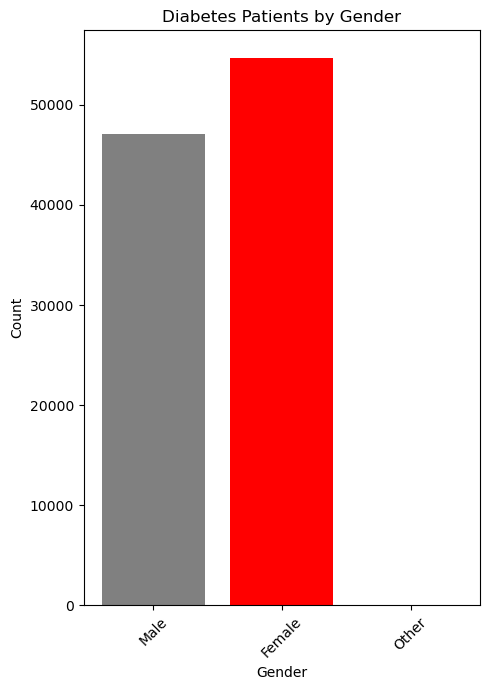

In [17]:
# Then we plot a bar plot with adding the labels,counts and the colors then display the plot.

labels = ["Male", "Female", "Other"]
counts = [Male, Female, Other]  
colors = ["grey", "red", "purple"]

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(5,7))
plt.bar(labels, counts, color=colors)

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Diabetes Patients by Gender')
plt.xticks(rotation=45) # improve readability
plt.tight_layout()
plt.show()

go through the process and include df1 = pd.DataFrame(df) to ensure the cleaned data is stored in a new DataFrame df1

In [18]:
df1 = pd.DataFrame(df)

In [19]:
df1.columns = ["Count"]

In [20]:
df1["pct"] = (df1["Count"]/(df1["Count"].sum()))*100

In [21]:

df1["pct"]

age
[0-10)       0.158206
[10-20)      0.679009
[20-30)      1.628245
[30-40)      3.709490
[40-50)      9.516931
[50-60)     16.956547
[60-70)     22.092840
[70-80)     25.615628
[80-90)     16.898571
[90-100)     2.744532
Name: pct, dtype: float64

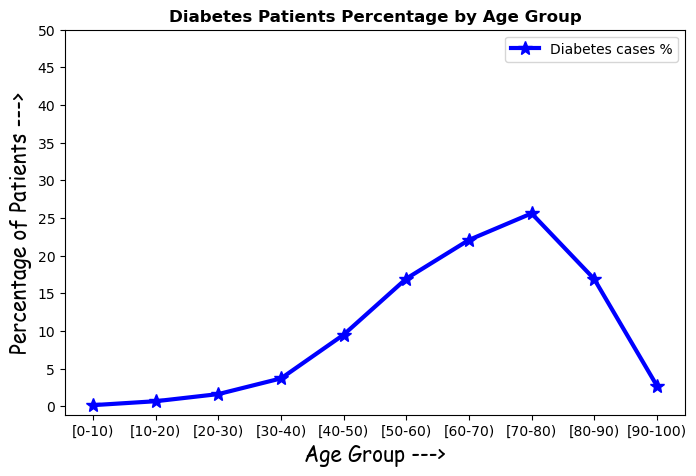

In [22]:
plt.figure(figsize = [8,5], dpi = 100)

plt.xlabel("Age Group --->", fontdict = {"fontname": "Comic Sans MS", "fontsize": 15})  # to label the axis x and y
plt.ylabel("Percentage of Patients --->", fontdict = {"fontname": "Comic Sans MS", "fontsize": 15})

plt.plot(df1["pct"], label = "Diabetes cases %", color = "blue", linewidth = 3, marker = "*", markersize = 10)
plt.title("Diabetes Patients Percentage by Age Group", fontdict = {"fontweight": "bold"})

plt.yticks([0,5,10,15,20,25,30,35,40,45,50])

plt.legend()
plt.show()

 this code snippet generates a count plot using Seaborn to visualize the distribution of the 'diabetesMed' variable in the diabetes_copy DataFrame.
 This visualization helps in understanding the frequency or distribution of values in the 'diabetesMed' column, which likely represents whether diabetes medication was administered or prescribed during patient encounters. 

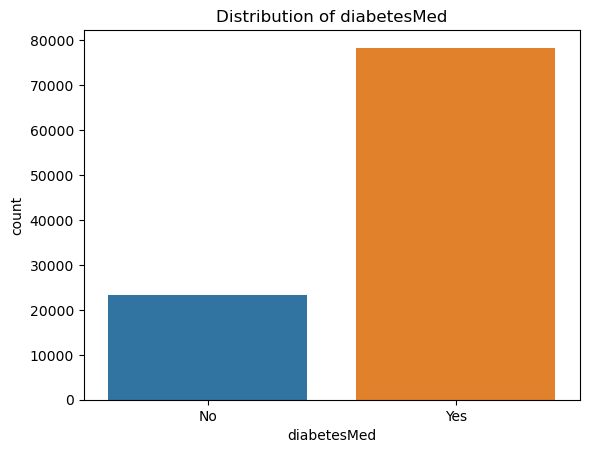

In [23]:
sns.countplot(x='diabetesMed', data=diabetes_copy)
plt.title('Distribution of diabetesMed')
plt.show()


<a href=#five>5. Feauture Engineering</a>

In [27]:
# Gives the new values
dataset_new = diabetes

In [28]:
dataset_new.isnull().sum()

id                              0
encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride   

<a href=#six>6. Modelling Section</a>

this code prepares the X and y datasets, splits them into training and testing sets, defines preprocessing pipelines for handling missing values and scaling/encoding features, and sets up a ColumnTransformer to apply these preprocessing steps to the appropriate columns in the dataset. This structured approach ensures that the data is properly prepared for machine learning model training.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define features and target
X = diabetes_copy.drop(columns=['diabetesMed'])
y = diabetes_copy['diabetesMed'].apply(lambda x: 1 if x == 'Yes' else 0)  # Convert target to binary

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical features
numeric_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 
                    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
categorical_features = ['race', 'gender', 'age', 'weight', 'admission_type_id', 
                        'discharge_disposition_id', 'admission_source_id', 'payer_code', 'medical_specialty', 
                        'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'change']


# Create preprocessing pipelines for missing values
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

 This demonstrates how to create a machine learning pipeline using Scikit-Learn.

This code snippet combines data preprocessing with the Random Forest classifier into a single pipeline (model). This allows for streamlined training and prediction processes, where the entire pipeline handles data transformation and model fitting in sequence. This structured approach is beneficial for maintaining consistency in data preprocessing and model application across different datasets and scenarios.

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Combine preprocessing with a classifier
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['time_in_hospital',
                                                   'num_lab_procedures',
                                                   'num_procedures',
                                                   'num_medications',
                                                   'number_outpatient',
                                                   'number_emergency',
                                                   'number_inpatient',
                                                   'number_diagnoses']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['race', 'gender', 'age',
                                                   'weight',
                                                   'admission_type_id',
                                                   'discharge_disposition_id',
                                                   'admission_source_id',
                                                   'payer_code',
                                                   'medical_specialty',
                                                   'diag_1', 'diag_2', 'diag_3',
                                                   'max_glu_serum', 'A1Cresult',
                                                   'change'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

Here we evaluate the performance of the Random Forest classifier (model) on the test dataset (X_test, y_test) using various metrics. It provides insights into the accuracy, precision, recall, F1-score, confusion matrix, and ROC AUC score, which collectively assess the classifier's effectiveness in predicting the 'diabetesMed' variable in the dataset. Adjustments and interpretations can be made based on specific requirements and goals of the classification task.


By evaluating these metrics, data scientists and machine learning practitioners can make informed decisions about the model's effectiveness, identify areas for improvement, and compare different models or parameter settings to optimize performance for the given task.

In [29]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

# Make predictions
y_pred_rf = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Evaluate ROC AUC Score if the classifier supports probability predictions
y_pred_proba_rf = model.predict_proba(X_test)[:, 1]
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_rf))

Accuracy: 0.7931610494251744
Confusion Matrix:
 [[ 1288  3320]
 [  890 14856]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.28      0.38      4608
           1       0.82      0.94      0.88     15746

    accuracy                           0.79     20354
   macro avg       0.70      0.61      0.63     20354
weighted avg       0.77      0.79      0.76     20354

ROC AUC Score: 0.8493223615212682


The main purpose of this code is to train a Gradient Boosting classifier (gb_model) on the training data (X_train, y_train), predict the target variable (diabetesMed) for the test data (X_test), and evaluate its performance using various metrics.
It provides insights into the accuracy, precision, recall, F1-score, confusion matrix, and ROC AUC score, which collectively assess the Gradient Boosting classifier's effectiveness in predicting 'diabetesMed' in the dataset.
These evaluations help in understanding how well the Gradient Boosting model performs compared to other models or parameter settings, aiding in model selection and optimization for the classification task.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the model pipeline
gb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))
y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]
print("Gradient Boosting ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_gb))


Gradient Boosting Accuracy: 0.7890832268841506
Gradient Boosting Confusion Matrix:
 [[ 1173  3435]
 [  858 14888]]
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.25      0.35      4608
           1       0.81      0.95      0.87     15746

    accuracy                           0.79     20354
   macro avg       0.70      0.60      0.61     20354
weighted avg       0.76      0.79      0.76     20354

Gradient Boosting ROC AUC Score: 0.8446471290217445


The purpose of this code snippet is to:
Set up a logistic regression model (logreg_model) within a pipeline that includes data preprocessing (preprocessor).
Train the logistic regression model on the training data (X_train, y_train).
Make predictions (y_pred_logreg) for the target variable (diabetesMed) using the trained model on the test dataset (X_test).
By using a pipeline (Pipeline), the code ensures that data preprocessing and model training are executed in a structured and reproducible manner. The trained logistic regression model can then be evaluated using various metrics (classification_report, accuracy_score, confusion_matrix, roc_auc_score) to assess its performance in predicting 'diabetesMed' based on the provided dataset.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

# Define the model pipeline
logreg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))
y_pred_proba_logreg = logreg_model.predict_proba(X_test)[:, 1]
print("Logistic Regression ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_logreg))


Logistic Regression Accuracy: 0.7821067112115555
Logistic Regression Confusion Matrix:
 [[ 1752  2856]
 [ 1579 14167]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.38      0.44      4608
           1       0.83      0.90      0.86     15746

    accuracy                           0.78     20354
   macro avg       0.68      0.64      0.65     20354
weighted avg       0.76      0.78      0.77     20354

Logistic Regression ROC AUC Score: 0.8407235341735821


This will display a DataFrame with the models and their corresponding accuracy and ROC AUC scores.


In [ ]:

models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracy = [accuracy_score(y_test, y_pred_logreg), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_gb)]
roc_auc = [roc_auc_score(y_test, y_pred_proba_logreg), roc_auc_score(y_test, y_pred_proba_rf), roc_auc_score(y_test, y_pred_proba_gb), ]

# Display the results
results = pd.DataFrame({'Model': models, 'Accuracy': accuracy, 'ROC AUC': roc_auc})
print(results)

                 Model  Accuracy   ROC AUC
0  Logistic Regression  0.782107  0.840724
1        Random Forest  0.793161  0.849322
2    Gradient Boosting  0.789083  0.844647


<a href=#eight>7. References </a>


1.T. M. Alama, M. A. Iqbala, Y. Ali et al., “A Model for Early Prediction of Diabetes,” Informatics in Medicine Unlocked, vol. 16, Article ID 100204, 2019.
View at: Publisher Site | Google Scholar

2.M. A. Sarwar, N. Kamal, W. Hamid, and M. A. Shah, “Prediction of Diabetes Using Machine Learning Algorithms in Healthcare,” in Proceedings of the 2018 24th International Conference on Automation and Computing (ICAC), Newcastle upon Tyne, UK, September 2018.
View at: Google Scholar

3.A. Mahabub, “A Robust Voting Approach for Diabetes Prediction Using Traditional Machine Learning Techniques,” SN Applied Sciences, Springer, 2019.
View at: Google Scholar

4.M. M. Bukhari, B. F. Alkhamees, S. Hussain, A. Gumaei, A. Assiri, and S. S. Ullah, “An improved artificial neural network model for effective dia- betes prediction,” Complexity, vol. 2021, Article ID 5525271, 10 pages, 2021.

View at: Publisher Site | Google Scholar
